<a href="https://colab.research.google.com/github/zlatte1/ds22_project/blob/main/polynomial_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fast_ml --quiet


In [2]:
#from fast_ml.model_development import train_valid_test_split
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [3]:
#load the data 
df = pd.read_csvdf = pd.read_csv('./data/movies_only_numeric.csv')

In [4]:
# Drop target column in df
X = df.drop('Rating', axis=1)
y = df['Rating']

In [5]:
# Convert X to a numpy array before reshaping  for polynomial 
X_array = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

Scikit-learn, the polynomial features are generated using the PolynomialFeatures class, which takes an input array of shape (n_samples, n_features) and generates a new array of shape (n_samples, n_features * (degree + 1)), where each column represents a polynomial feature of a certain degree.  We need to pass a 2D array of shape (n_samples, 1), which means that your input data x should be reshaped to have a single column and as many rows as there are samples.


In [6]:
# Generate polynomial features up to degree 2
poly= PolynomialFeatures(degree=2, include_bias= False)
pol_feat = poly.fit_transform(X_array)


In [7]:
# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.25, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1448, 49)
(91, 49)
(271, 49)


In [9]:
from sklearn.preprocessing import RobustScaler

In [10]:
scaler = RobustScaler()

# Apply scaler to training, validation, and test data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [11]:

# Fit a polynomial regression model to the scaled data
poly_reg = LinearRegression()
poly_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [12]:

# Evaluate the model on the validation set
y_val_pred = poly_reg.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_val_pred)
print("Validation set MSE: {:.2f}".format(mse_val))

# Evaluate the model on the test set
y_test_pred = poly_reg.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Test set MSE: {:.2f}".format(mse_test))



Validation set MSE: 0.59
Test set MSE: 0.48


In [13]:
y_train_pred = poly_reg.predict(X_train_scaled)
y_val_pred = poly_reg.predict(X_val_scaled)
y_test_pred = poly_reg.predict(X_test_scaled)


In [14]:
mse_train = mean_squared_error(y_train, y_train_pred)
RMSE_train = np.sqrt(mse_train)

print(f'mse of Train set : {mse_train}')
print(f'RMSE of Train set : {RMSE_train}')

mse of Train set : 0.4947235006005634
RMSE of Train set : 0.7033658369586651


In [15]:
#predictions on test set
mse = mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(mse)

print(f'mse of Test set : {mse}')
print(f'RMSE of Test set : {RMSE}')

mse of Test set : 0.478670277179982
RMSE of Test set : 0.6918600127048694


In [16]:
mse = mean_squared_error(y_val, y_val_pred)
RMSE = np.sqrt(mse)

print(f'Mean square error of val set : {mse}')
print(f'RMSE of val set: {RMSE}')

Mean square error of val set : 0.5906340602584965
RMSE of val set: 0.7685272020289825


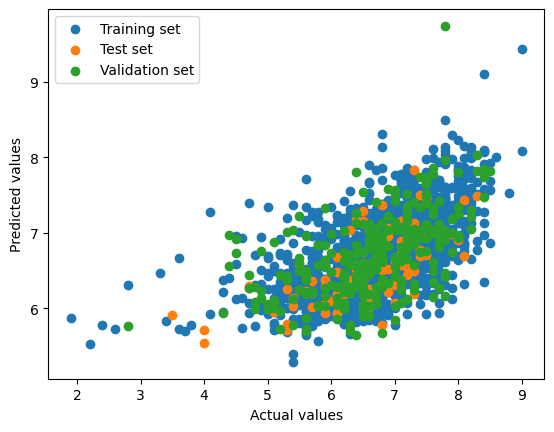

In [17]:

# Plot actual vs predicted values for each set
plt.scatter(y_train, y_train_pred, label='Training set')
plt.scatter(y_test, y_test_pred, label='Test set')
plt.scatter(y_val, y_val_pred, label='Validation set')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.legend()
plt.show()



Text(0.5, 1.0, 'Test set')

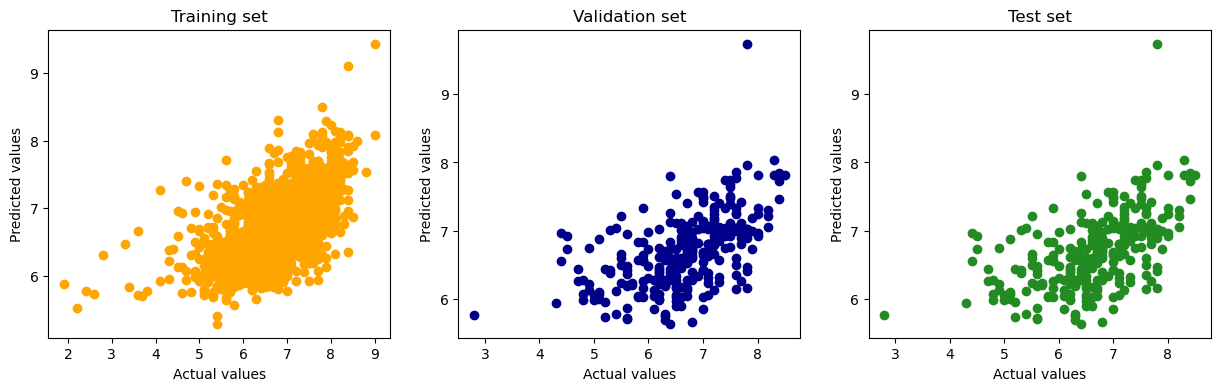

In [18]:
# Subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot actual vs. predicted values for training set
axs[0].scatter(y_train, y_train_pred, label='Training set', color='orange')
axs[0].set_xlabel('Actual values')
axs[0].set_ylabel('Predicted values')
axs[0].set_title('Training set')

# Plot actual vs. predicted values for validation set
axs[1].scatter(y_val, y_val_pred, label='Validation set', color='darkblue')
axs[1].set_xlabel('Actual values')
axs[1].set_ylabel('Predicted values')
axs[1].set_title('Validation set')

# Plot actual vs. predicted values for validation set
axs[2].scatter(y_val, y_val_pred, label='Test set', color='forestgreen')
axs[2].set_xlabel('Actual values')
axs[2].set_ylabel('Predicted values')
axs[2].set_title('Test set')
